In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans

%matplotlib inline

In [2]:
import lib.preprocess.user_load_data as user_load_data
import lib.preprocess.pipline as pipline
import lib.cluster.K_Means as K_Means
import importlib

importlib.reload(user_load_data)
importlib.reload(pipline)
importlib.reload(K_Means)

<module 'lib.cluster.K_Means' from 'D:\\Project\\Python\\household-electricity\\lib\\cluster\\K_Means.py'>

In [3]:
dataSet = pipline.load_preprocess_dataSet('2018-08-28-21-04-49_max_min_sum_w_dataSet.csv')
dataSet.head()

,userId,reportTime,period_1,period_2,period_3,period_4,period_5,period_6,period_7,period_8,...,period_90,period_91,period_92,period_93,period_94,period_95,period_96,wMax,wMin,wSum
uuid,,,,,,,,,,,,,,,,,,,,,
1020170801,1,2017-08-01,907.80,701.2,964.2,817.75,813.6,1037.8,723.2,494.60,...,1840.6,1320.40,1093.4,907.0,893.0,906.8,469.75,4595.2,135.50,20667.67
1020170802,1,2017-08-02,693.80,694.8,947.6,1022.60,1286.6,848.6,1360.0,1220.00,...,1537.0,1150.20,1271.0,1236.4,1567.8,1151.8,1392.60,3382.5,176.75,21649.61
1020170803,1,2017-08-03,974.25,1343.2,1513.0,844.80,1148.4,1326.2,1319.8,879.00,...,902.0,797.00,962.8,791.4,951.4,884.2,734.80,4585.4,149.20,32833.36
1020170804,1,2017-08-04,1090.25,979.6,699.8,914.20,674.6,676.8,752.6,887.33,...,3004.6,2508.75,1623.0,1172.2,1183.8,889.0,1394.00,5295.8,137.20,24774.05
1020170805,1,2017-08-05,1080.50,1151.0,1109.6,883.20,1106.2,1104.6,1153.0,954.25,...,3130.8,2971.50,1988.4,1750.8,1204.2,1276.0,1221.00,3130.8,169.60,28111.41


In [4]:
tmpdataSet = pipline.get_peroid_column_dataSet(dataSet)
tmpdataSet.head()

,userId,period_1,period_2,period_3,period_4,period_5,period_6,period_7,period_8,period_9,...,period_87,period_88,period_89,period_90,period_91,period_92,period_93,period_94,period_95,period_96
uuid,,,,,,,,,,,,,,,,,,,,,
1020170801,1,907.80,701.2,964.2,817.75,813.6,1037.8,723.2,494.60,717.6,...,1577.2,4020.0,4583.25,1840.6,1320.40,1093.4,907.0,893.0,906.8,469.75
1020170802,1,693.80,694.8,947.6,1022.60,1286.6,848.6,1360.0,1220.00,788.2,...,1818.2,1599.2,1741.60,1537.0,1150.20,1271.0,1236.4,1567.8,1151.8,1392.60
1020170803,1,974.25,1343.2,1513.0,844.80,1148.4,1326.2,1319.8,879.00,1292.0,...,1571.0,4096.6,1514.00,902.0,797.00,962.8,791.4,951.4,884.2,734.80
1020170804,1,1090.25,979.6,699.8,914.20,674.6,676.8,752.6,887.33,794.4,...,5295.8,3434.0,2591.60,3004.6,2508.75,1623.0,1172.2,1183.8,889.0,1394.00
1020170805,1,1080.50,1151.0,1109.6,883.20,1106.2,1104.6,1153.0,954.25,581.6,...,630.0,2593.2,2957.20,3130.8,2971.50,1988.4,1750.8,1204.2,1276.0,1221.00


In [39]:
peroid_column = user_load_data.create_peroid_column()
n_clusters = 3
kmeans_fit = KMeans(n_clusters=n_clusters).fit(tmpdataSet[peroid_column])

# # 每個集群中心點的標籤
# kmeans_fit.labels_
# # 每個集群中心的坐標
# kmeans_fit.cluster_centers_
# # 所有樣本距離集群中心點的距離總和
# kmeans_fit.inertia_

# 將 K-Means 每個集群中心的坐標資料存成 dataFrame
KMeans_cluster_centers_df = K_Means.get_cluster_centers_dataFrame(kmeans_fit.cluster_centers_)

# 將 K-Means 每個集群中心的坐標資料資料存成 CSV
K_Means.save_cluster_centers_csv(KMeans_cluster_centers_df, n_clusters)
KMeans_cluster_centers_df.head()

save: data/2018-09-04-05-52-18_K-Means_3-cluster_centers.csv


,index,period_1,period_2,period_3,period_4,period_5,period_6,period_7,period_8,period_9,...,period_87,period_88,period_89,period_90,period_91,period_92,period_93,period_94,period_95,period_96
0,0,1002.58,942.56,956.38,847.11,805.56,821.30,781.58,774.65,744.12,...,2275.41,2047.30,1976.93,1735.04,1451.11,1286.38,1271.85,1203.68,1176.43,1088.53
1,1,759.59,701.50,638.91,614.65,593.84,551.05,525.52,509.29,495.50,...,781.16,816.67,849.70,874.33,856.18,889.10,868.63,832.08,828.53,815.28
2,2,324.39,296.80,252.11,253.48,245.31,236.28,216.58,217.90,212.80,...,389.84,425.14,449.75,479.08,475.22,442.35,430.04,413.17,389.61,354.12


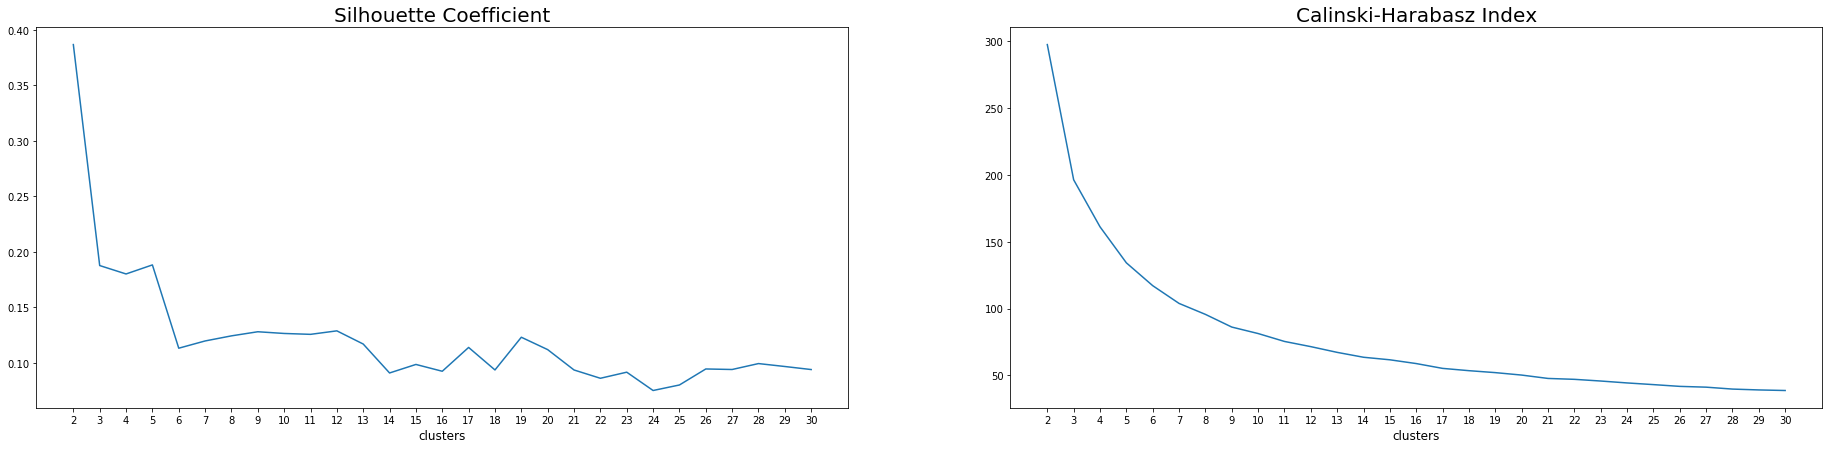

In [25]:
K_Means.evaluate_visualization(tmpdataSet, min_clusters=2, max_clusters=30)

In [13]:
def generate_colors(length):
    hex_str = '0123456789ABCDEF'
    hex_list = [i for i in hex_str]
    # 6 碼
    np_codes = np.random.choice(hex_list, [length, 6])
    return ['#' + ''.join(np_codes[i]) for i in range(len(np_codes))]

In [14]:
generate_colors(5)

['#8AF5DB', '#BDC76C', '#B7B621', '#B9888E', '#8E83B5']

n_clusters:2, label:0
n_clusters:2, label:1
n_clusters:3, label:0
n_clusters:3, label:1
n_clusters:3, label:2
n_clusters:4, label:0
n_clusters:4, label:1
n_clusters:4, label:2
n_clusters:4, label:3
n_clusters:5, label:0
n_clusters:5, label:1
n_clusters:5, label:2
n_clusters:5, label:3
n_clusters:5, label:4


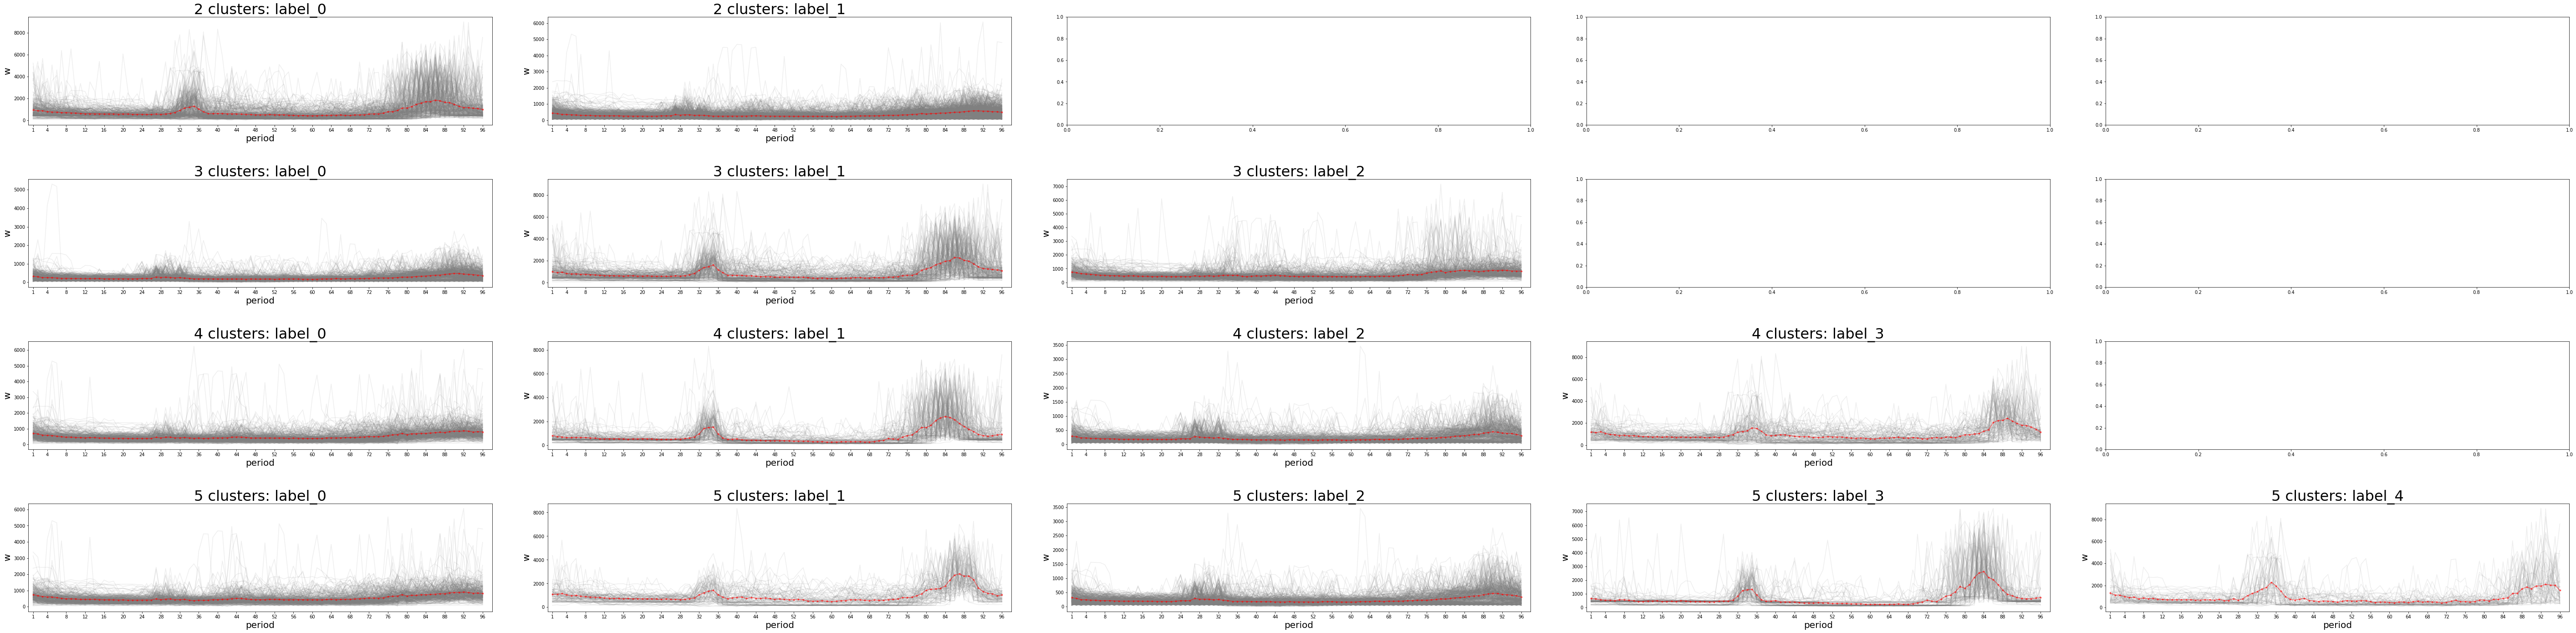

In [15]:
K_Means.nxm_clusters_visualization(tmpdataSet, min_clusters=2, max_clusters=5)

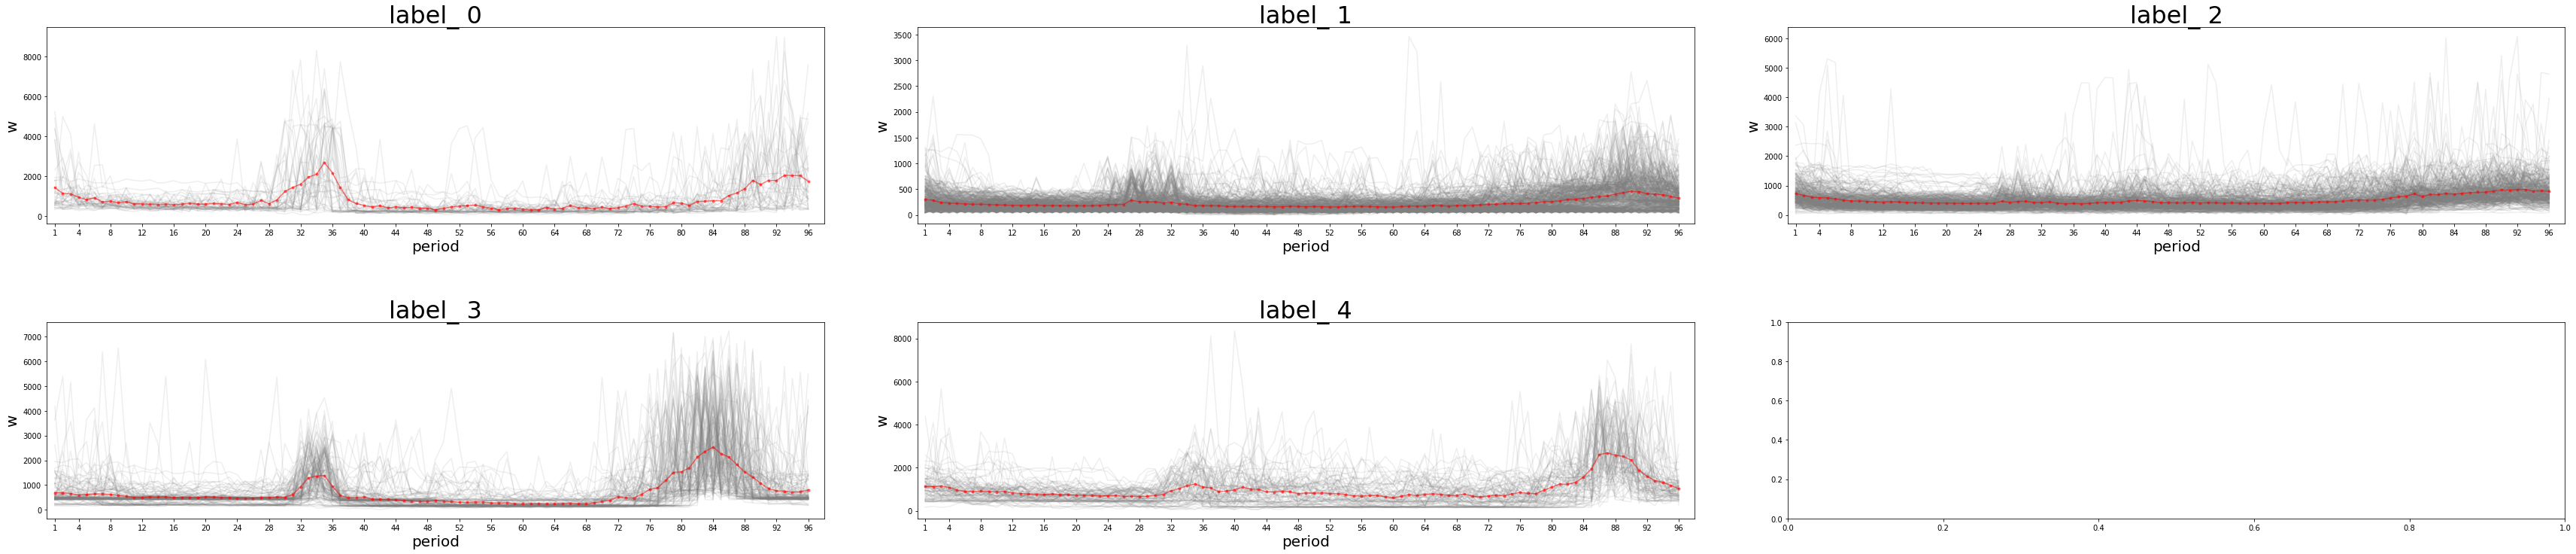

In [16]:
K_Means.n_clusters_visualization_matrix(tmpdataSet, n_clusters=5, ncols=3)